# Importação das bibliotecas



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
%matplotlib inline
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Classificadores
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn import metrics 
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# Análise Exploratória dos Dados

## Entendimento Inicial dos Dados

*   Carregamento da base

In [ ]:
df = pd.read_csv("fake_job_postings.csv")
print("Número de registros:", len(df))
df.head(1)

Número de registros: 17880


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0


*   Renomeio das colunas

In [ ]:
df = df.rename(columns = {"job_id" : "Id",
                          "title" : "Titulo",
                          "location" : "Localizacao",
                          "department" : "Departamento",
                          "salary_range" : "Faixa_Salarial",
                          "company_profile" : "Perfil_Empresa",
                          "description" : "Descricao",
                          "requirements" : "Requisitos",
                          "benefits" : "Beneficios",
                          "telecommuting" : "Trabalho_Remoto",
                          "has_company_logo" : "Empresa_Tem_Logo",
                          "has_questions" : "Tem_Perguntas",
                          "employment_type" : "Tipo_Emprego",
                          "required_experience" : "Experiencia_Necessaria",
                          "required_education" : "Grau_Ensino",
                          "industry" : "Industria",
                          "function" : "Funcao",
                          "fraudulent" : "Fraudulento"})


In [ ]:
#Colunas com nomes renomeados
df.head(1)

,Id,Titulo,Localizacao,Departamento,Faixa_Salarial,Perfil_Empresa,Descricao,Requisitos,Beneficios,Trabalho_Remoto,Empresa_Tem_Logo,Tem_Perguntas,Tipo_Emprego,Experiencia_Necessaria,Grau_Ensino,Industria,Funcao,Fraudulento
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0


## Visualização dos Dados

*   Informações

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      17880 non-null  int64 
 1   Titulo                  17880 non-null  object
 2   Localizacao             17534 non-null  object
 3   Departamento            6333 non-null   object
 4   Faixa_Salarial          2868 non-null   object
 5   Perfil_Empresa          14572 non-null  object
 6   Descricao               17879 non-null  object
 7   Requisitos              15185 non-null  object
 8   Beneficios              10670 non-null  object
 9   Trabalho_Remoto         17880 non-null  int64 
 10  Empresa_Tem_Logo        17880 non-null  int64 
 11  Tem_Perguntas           17880 non-null  int64 
 12  Tipo_Emprego            14409 non-null  object
 13  Experiencia_Necessaria  10830 non-null  object
 14  Grau_Ensino             9775 non-null   object
 15  In

*   Valores Nulos

In [ ]:
df.isnull().sum()

Id                            0
Titulo                        0
Localizacao                 346
Departamento              11547
Faixa_Salarial            15012
Perfil_Empresa             3308
Descricao                     1
Requisitos                 2695
Beneficios                 7210
Trabalho_Remoto               0
Empresa_Tem_Logo              0
Tem_Perguntas                 0
Tipo_Emprego               3471
Experiencia_Necessaria     7050
Grau_Ensino                8105
Industria                  4903
Funcao                     6455
Fraudulento                   0
dtype: int64

Text(0, 0.5, 'Colunas')

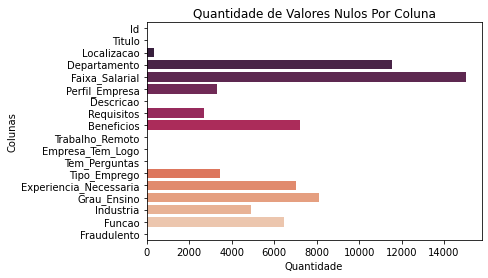

In [ ]:
sns.barplot(df.isnull().sum(),df.columns, palette = "rocket")
plt.title("Quantidade de Valores Nulos Por Coluna")
plt.xlabel("Quantidade")
plt.ylabel("Colunas")

In [ ]:
valoresNulos = pd.DataFrame({"Qtd_Nulos":df.isnull().sum(),"%Valores_Nulos":(df.isnull().sum()/df.shape[0] * 100).round()})
valoresNulos[valoresNulos["Qtd_Nulos"]!=0]

,Qtd_Nulos,%Valores_Nulos
Localizacao,346,2.0
Departamento,11547,65.0
Faixa_Salarial,15012,84.0
Perfil_Empresa,3308,19.0
Descricao,1,0.0
Requisitos,2695,15.0
Beneficios,7210,40.0
Tipo_Emprego,3471,19.0
Experiencia_Necessaria,7050,39.0
Grau_Ensino,8105,45.0


* Valores Únicos

In [ ]:
df.nunique()

Id                        17880
Titulo                    11231
Localizacao                3105
Departamento               1337
Faixa_Salarial              874
Perfil_Empresa             1709
Descricao                 14801
Requisitos                11968
Beneficios                 6205
Trabalho_Remoto               2
Empresa_Tem_Logo              2
Tem_Perguntas                 2
Tipo_Emprego                  5
Experiencia_Necessaria        7
Grau_Ensino                  13
Industria                   131
Funcao                       37
Fraudulento                   2
dtype: int64

*   Valores Duplicados

In [ ]:
df.duplicated().sum()

0

* Outliers 

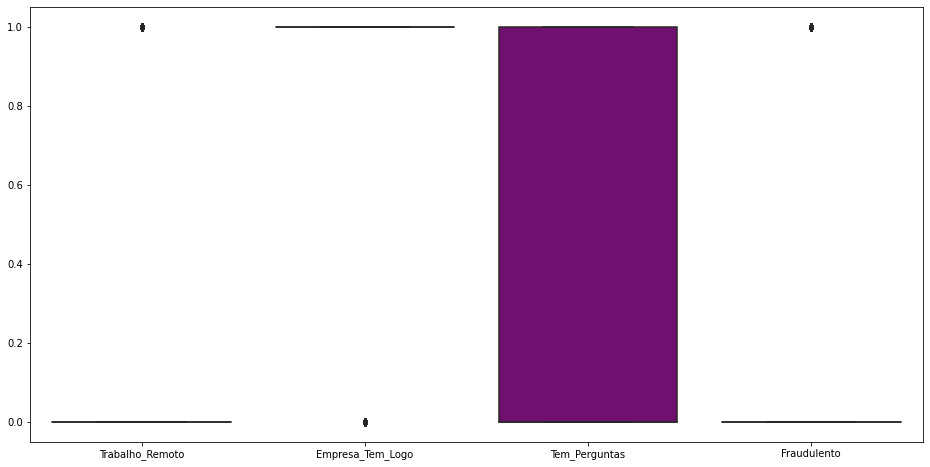

In [ ]:
df_num = df[["Trabalho_Remoto","Empresa_Tem_Logo","Tem_Perguntas","Fraudulento"]]

#Verifica se há outliers nas colunas numéricas
plt.figure(figsize=[16,8])
sns.boxplot(data = df_num, color="purple")
plt.show()

## Análises Univariadas, Bivariadas e Multivariadas

* Experiência Necessária

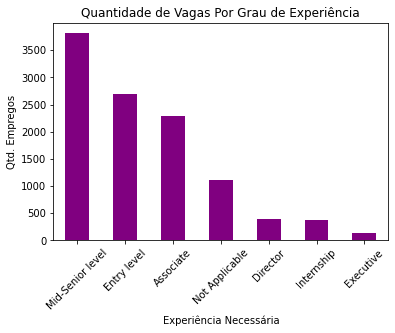

In [ ]:
#Quantidade de vagas por experiência
experiencias = df.Experiencia_Necessaria.value_counts()
experiencias.plot(kind = "bar", color = "purple")
plt.title("Quantidade de Vagas Por Grau de Experiência")
plt.xlabel("Experiência Necessária")
plt.ylabel("Qtd. Empregos")
plt.xticks(rotation = 45)
plt.show()

* Nível de Escolaridade

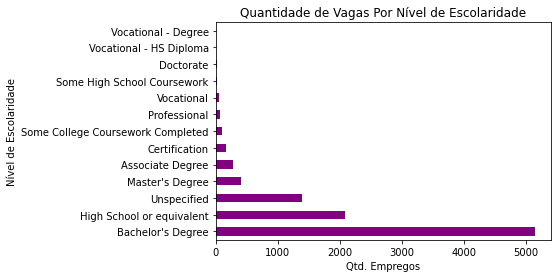

In [ ]:
#Quantidade de Vagas por Nível de Escolaridade
escolaridade = df.Grau_Ensino.value_counts()
escolaridade.plot(kind = "barh", color = "purple")
plt.title("Quantidade de Vagas Por Nível de Escolaridade")
plt.xlabel("Qtd. Empregos")
plt.ylabel("Nível de Escolaridade")
plt.show()

* Tipo de Emprego

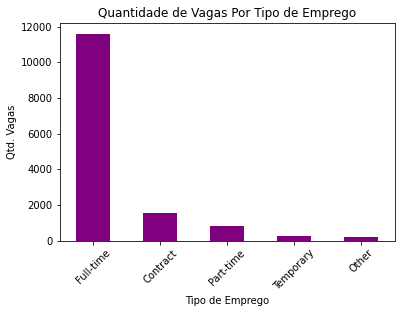

In [ ]:
#Quantidade de Vagas por Tipo de Emprego
tipoEmprego = df.Tipo_Emprego.value_counts()
tipoEmprego.plot(kind = "bar", color = "purple")
plt.title("Quantidade de Vagas Por Tipo de Emprego")
plt.xlabel("Tipo de Emprego")
plt.ylabel("Qtd. Vagas")
plt.xticks(rotation=45)
plt.show()

* Industrias que oferecem os maiores numeros de vagas remotas

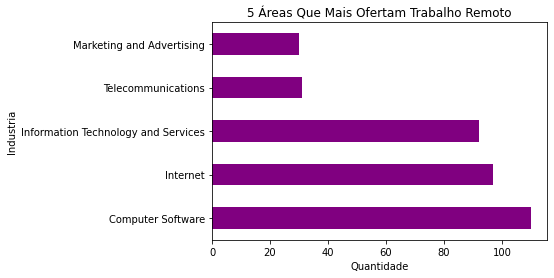

In [ ]:
df_Industria = df[df["Trabalho_Remoto"] == 1]
df_Industria["Industria"].value_counts()

#5 áreas que mais ofertam trabalham remoto
remoto = df_Industria.Industria.value_counts()[:5]
remoto.plot(kind = "barh", color = "purple")
plt.title("5 Áreas Que Mais Ofertam Trabalho Remoto")
plt.xlabel("Quantidade")
plt.ylabel("Industria")
plt.show()

* Indústria com o maior numero de vagas falsas

In [ ]:
df_Industria = df[df["Fraudulento"] == 1]
df_Industria["Industria"].value_counts().head(1)

Oil & Energy    109
Name: Industria, dtype: int64

*   Correlação

Text(0.5, 1.0, 'Correlação')

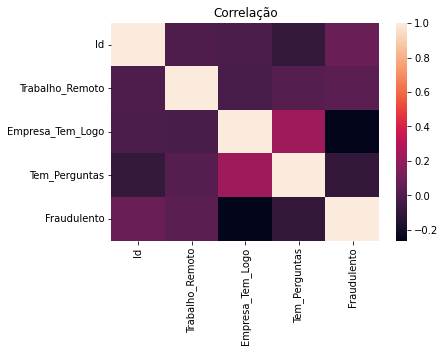

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap="rocket")
plt.title("Correlação")

*   Target

Text(0.5, 1.0, 'Vagas Reais e Falsas')

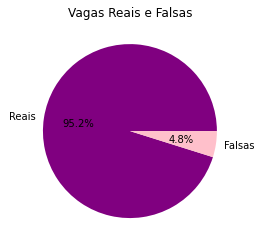

In [ ]:
df["Fraudulento"].value_counts().plot(kind="pie", autopct ="%1.1f%%", labels=["Reais", "Falsas"], colors = ["purple", "pink"])
plt.ylabel(" ")
plt.title("Vagas Reais e Falsas")

**Conclusões**
1. As colunas *Faixa_Salarial* e *Departamento* têm o maior número de valores nulos, sendo que em *Faixa_Salarial* os valores nulos representam 85% do total e em *Departamento* representam 65%. Por esse motivo elas serão removidas.
2. A coluna *Id* também será removida por não ser necessária para o estudo.
3. As únicas colunas númericas, além da coluna *Id* são *Trabalho_Remoto, Empresa_Tem_Logo, Tem_Perguntas* e *Fraudulento*, sendo que estas tem caráter binário. Além disso, elas não possuem praticamente nenhuma correlação entre si.
4. As colunas *Trabalho_Remoto*, *Empresa_Tem_Logo* e a target *Fraudulento*, possuem outliers e estes serão removidos.
5. A target (*Fraudulento*) está desbalanceada, e será necessário arrumar estes dados.

## Preparação dos Dados

### *Feature engineering*

* Substitui valores nulos

In [ ]:
# De nulos para "Desconhecido"
df["Beneficios"] = df["Beneficios"].fillna("Desconhecido")

# De nulos para "Desconhecido"
df["Requisitos"] = df["Requisitos"].fillna("Desconhecido")

# De nulos para "Desconhecida"
df["Descricao"] = df["Descricao"].fillna("Desconhecida")

# De nulos para "Desconhecido"
df["Grau_Ensino"] = df["Grau_Ensino"].fillna("Desconhecido")

# De nulos para "Desconhecido"
df["Perfil_Empresa" ]= df["Perfil_Empresa"].fillna("Desconhecido")

* Para reduzir o número de colunas e para melhor treinamento do modelo, as colunas *Titulo*, *Localizacao*, *Perfil_Empresa*, *Descricao*, *Requisitos* e *Beneficios* serão concatenadas e transformadas na coluna ***Vaga***

In [ ]:
df["Vaga"] =  df["Titulo"] + " " + df["Localizacao"] + " " + df["Perfil_Empresa"] + " " + df["Descricao"] + " " + \
              df["Requisitos"] + " " + df["Beneficios"] + " " + df["Tipo_Emprego"] + " " + df["Grau_Ensino"] + " " + df["Industria"] + " " + \
              df["Funcao"] 

### Limpeza dos Dados

In [ ]:
#Remove registros nulos
df.dropna(axis= 0, how= "any", inplace=True)

In [ ]:
#Remoção de colunas
del df["Id"]
del df["Faixa_Salarial"]
del df["Departamento"]
del df["Titulo"]
del df["Localizacao"]
del df["Perfil_Empresa"]
del df["Descricao"]
del df["Requisitos"]
del df["Beneficios"]
del df["Tipo_Emprego"]
del df["Experiencia_Necessaria"]
del df["Grau_Ensino"]
del df["Industria"]
del df["Funcao"]

In [ ]:
df.head(1)

,Trabalho_Remoto,Empresa_Tem_Logo,Tem_Perguntas,Fraudulento,Vaga
6,0,1,1,0,"Head of Content (m/f) DE, BE, Berlin Founded i..."


In [ ]:
#Verifica se há registros duplicados
df.duplicated().sum()

25

In [ ]:
#Remove os registros duplicados
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
#Verifica se ainda há valores nulos
df.isnull().sum()

Trabalho_Remoto     0
Empresa_Tem_Logo    0
Tem_Perguntas       0
Fraudulento         0
Vaga                0
dtype: int64

In [ ]:
#Tamanho do dataframe após limpeza dos dados
df.shape

(1115, 5)

### Analisa Palavras Frequentes

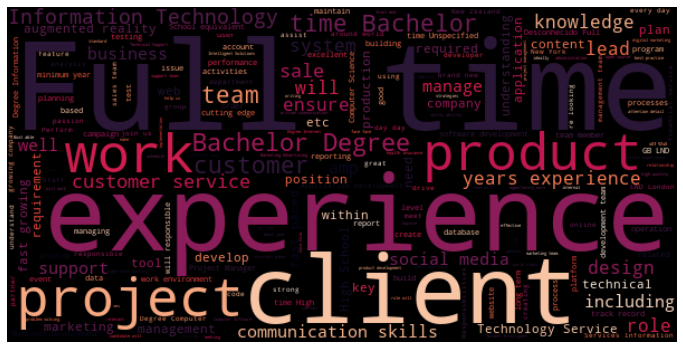

In [ ]:
#Palavras frequentemente utilizadas em vagas reais
vagasReais = " ".join([texto for texto in df["Vaga"][df["Fraudulento"]==0]])
wordcloud1 = WordCloud(width = 600 ,height = 300, max_font_size = 120, colormap="rocket").generate(vagasReais)
plt.figure(figsize =(12,12))
plt.axis("off")
plt.imshow(wordcloud1, interpolation="bilinear")
plt.show()

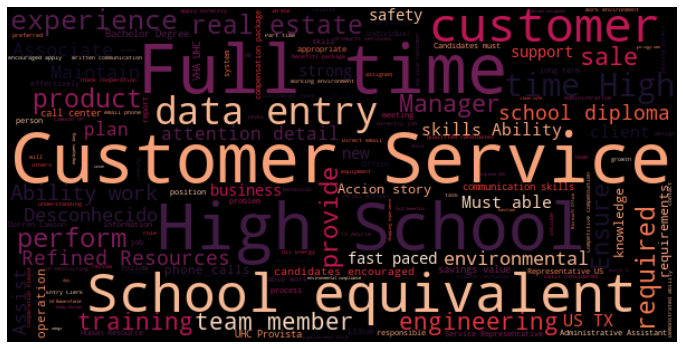

In [ ]:
#Palavras frequentemente utilizadas em vagas falsas
vagasFalsas = " ".join([texto for texto in df["Vaga"][df["Fraudulento"]==1]])
wordcloud2 = WordCloud(width = 600 ,height = 300, max_font_size = 120, colormap="rocket").generate(vagasFalsas)
plt.figure(figsize =(12,12))
plt.inferno()
plt.axis("off")
plt.imshow(wordcloud2, interpolation="bilinear")
plt.show()

## Enconding

In [ ]:
le = LabelEncoder()
df["Vaga"] = le.fit_transform(df["Vaga"])
df.head(1)

,Trabalho_Remoto,Empresa_Tem_Logo,Tem_Perguntas,Fraudulento,Vaga
6,0,1,1,0,450


##Balanceamento

**Random Under Sampling**

Nesta fase do projeto será implementado o *Random Under Sampling* que consiste basicamente em remover os dados para ter um conjunto de dados mais balanceado e assim evitar o overfitting dos modelos.

1. A primeira coisa a se fazer é determinar o quão desequilibrada é a classe, utilizando *value_counts()* na coluna para determinar o valor de cada rótulo.
2. Depois de determinadas quantas instâncias são consideradas fraudulentas, será necessário trazer as não fraudulentas para a mesma proporção (50/50).
3. O próximo passo então é embaralhar os dados para ver se os modelos podem manter uma certa precisão toda vez que executar esse script.

* **OBS**: O principal problema com *Random Under-Sampling* é que corre-se o risco de os modelos de classificação não funcionarem com a precisão que desejada, pois há uma perda de informações.

In [ ]:
#Distribuição atual da target 
df["Fraudulento"].value_counts()

0    1005
1     110
Name: Fraudulento, dtype: int64

In [ ]:
# Embaralhar os dados
df = df.sample(frac=1)

#Fraudulentos
df_falsos = df.loc[df["Fraudulento"] == 1]
df_reais = df.loc[df["Fraudulento"] == 0][:110]

df_distribuido = pd.concat([df_falsos, df_reais])

# Embaralhar as linhas do dataframe
df_Novo = df_distribuido.sample(frac = 1, random_state=11)

df_Novo.head()

,Trabalho_Remoto,Empresa_Tem_Logo,Tem_Perguntas,Fraudulento,Vaga
10639,0,1,1,0,650
17652,0,0,0,1,167
17783,0,0,0,1,1105
15396,0,1,1,0,820
17668,1,1,0,1,824


Distribuição da Target:
0    0.5
1    0.5
Name: Fraudulento, dtype: float64


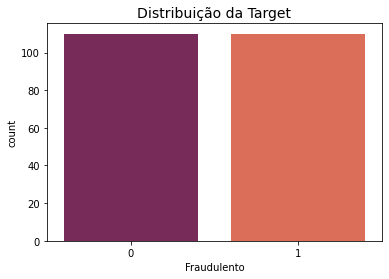

In [ ]:
print("Distribuição da Target:")
print(df_Novo["Fraudulento"].value_counts()/len(df_Novo))

sns.countplot("Fraudulento", data=df_Novo, palette="rocket")
plt.title("Distribuição da Target", fontsize=14)
plt.show()

# Modelo

## Treinamento e Teste

* Nesta etapa, serão utilizados três tipos de classificadores com o intuito de descobrir qual classificador será mais eficaz na detecção de vagas fraudulentas, sendo eles:
1. Árvore de Decisão (Decision Tree)
2. KNN (K Nearest Neighbours)
3. Floresta Aleatória (Random Forest)
* Primeiro então, os dados serão dividios em conjuntos de treinamento e teste e separados os recursos dos rótulos.

In [ ]:
x = pd.DataFrame(df_Novo[["Trabalho_Remoto",	"Empresa_Tem_Logo",	"Tem_Perguntas", "Vaga"]])
y = pd.DataFrame(df_Novo["Fraudulento"])

#Divide o dataframe em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 11)

#Verifica os tamanhos
print("Dados de treinamento: ", y_train.shape, x_train.shape)
print("Dados de teste: ", y_test.shape, x_test.shape)

Dados de treinamento:  (154, 1) (154, 4)
Dados de teste:  (66, 1) (66, 4)


### Árvore de Decisão

              precision    recall  f1-score   support

           0       0.89      0.69      0.77        35
           1       0.72      0.90      0.80        31

    accuracy                           0.79        66
   macro avg       0.80      0.79      0.79        66
weighted avg       0.81      0.79      0.79        66



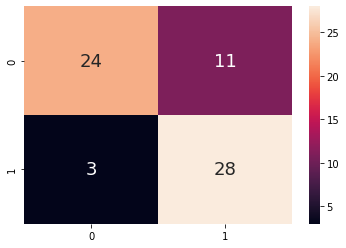

In [ ]:
#treinamento e teste
x_trainDT = x_train
x_testDT = x_test
y_trainDT = y_train 
y_testDT = y_test

#Treina o modelo
dT =  tree.DecisionTreeClassifier() 
dT.fit(x_trainDT, y_trainDT)

#Testa o modelo
dTPred = dT.predict(x_testDT)

#Apresenta o classification_report
print(classification_report(y_testDT, dTPred))

#Plota a matriz de confusão
sns.heatmap(confusion_matrix(y_testDT, dTPred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, cmap = "rocket")

In [ ]:
#Apresenta as métricas
print("Os valores encontrados para cada métrica foram:\n")
print("F1-Score"+" = "+str(round(f1_score(y_testDT, dTPred),4)))
print("Precision"+" = "+str(round(precision_score(y_testDT, dTPred),4)))
print("Recall"+" = "+str(round(recall_score(y_testDT, dTPred),4)))
print("Accuracy"+" = "+str(round(accuracy_score(y_testDT, dTPred),4)))

Os valores encontrados para cada métrica foram:

F1-Score = 0.8
Precision = 0.7179
Recall = 0.9032
Accuracy = 0.7879


### KNN

              precision    recall  f1-score   support

           0       0.90      0.51      0.65        35
           1       0.63      0.94      0.75        31

    accuracy                           0.71        66
   macro avg       0.77      0.72      0.70        66
weighted avg       0.77      0.71      0.70        66



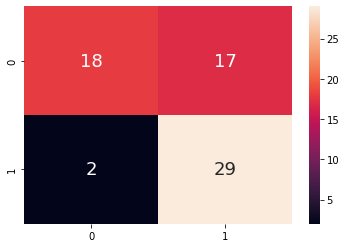

In [ ]:
#treinamento e teste
x_trainKNN = x_train
x_testKNN = x_test
y_trainKNN = y_train 
y_testKNN = y_test

#Treina o modelo
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_trainKNN, y_trainKNN)

#Testa o modelo
knnPred = knn.predict(x_testKNN)

#Apresenta o classification_report
print(classification_report(y_testKNN, knnPred))

#Plota a matriz de confusão
sns.heatmap(confusion_matrix(y_testKNN, knnPred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, cmap = "rocket")

In [ ]:
#Apresenta as métricas
print("Os valores encontrados para cada métrica foram:\n")
print("F1-Score"+" = "+str(round(f1_score(y_testKNN, knnPred),4)))
print("Precision"+" = "+str(round(precision_score(y_testKNN, knnPred),4)))
print("Recall"+" = "+str(round(recall_score(y_testKNN, knnPred),4)))
print("Accuracy"+" = "+str(round(accuracy_score(y_testKNN, knnPred),4)))

Os valores encontrados para cada métrica foram:

F1-Score = 0.7532
Precision = 0.6304
Recall = 0.9355
Accuracy = 0.7121


### Random Forest

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        35
           1       0.75      0.87      0.81        31

    accuracy                           0.80        66
   macro avg       0.81      0.81      0.80        66
weighted avg       0.81      0.80      0.80        66



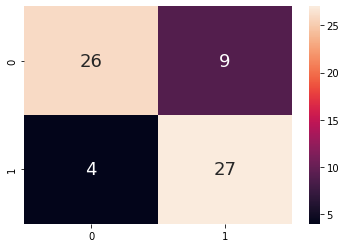

In [ ]:
#treinamento e teste
x_trainRFC = x_train
x_testRFC = x_test
y_trainRFC = y_train 
y_testRFC = y_test

#Treina o modelo
rfc = RandomForestClassifier()
rfc.fit(x_trainRFC,y_trainRFC)

#Testa o modelo
rfcPred = rfc.predict(x_testRFC)

#Apresenta o classification_report
print(classification_report(y_testRFC, rfcPred))

#Plota a matriz de confusão
sns.heatmap(confusion_matrix(y_testRFC, rfcPred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, cmap = "rocket")

In [ ]:
#Apresenta as métricas
print("Os valores encontrados para cada métrica foram:\n")
print("F1-Score"+" = "+str(round(f1_score(y_testRFC, rfcPred),4)))
print("Precision"+" = "+str(round(precision_score(y_testRFC, rfcPred),4)))
print("Recall"+" = "+str(round(recall_score(y_testRFC, rfcPred),4)))
print("Accuracy"+" = "+str(round(accuracy_score(y_testRFC,rfcPred),4)))

Os valores encontrados para cada métrica foram:

F1-Score = 0.806
Precision = 0.75
Recall = 0.871
Accuracy = 0.803


###Comparação dos modelos

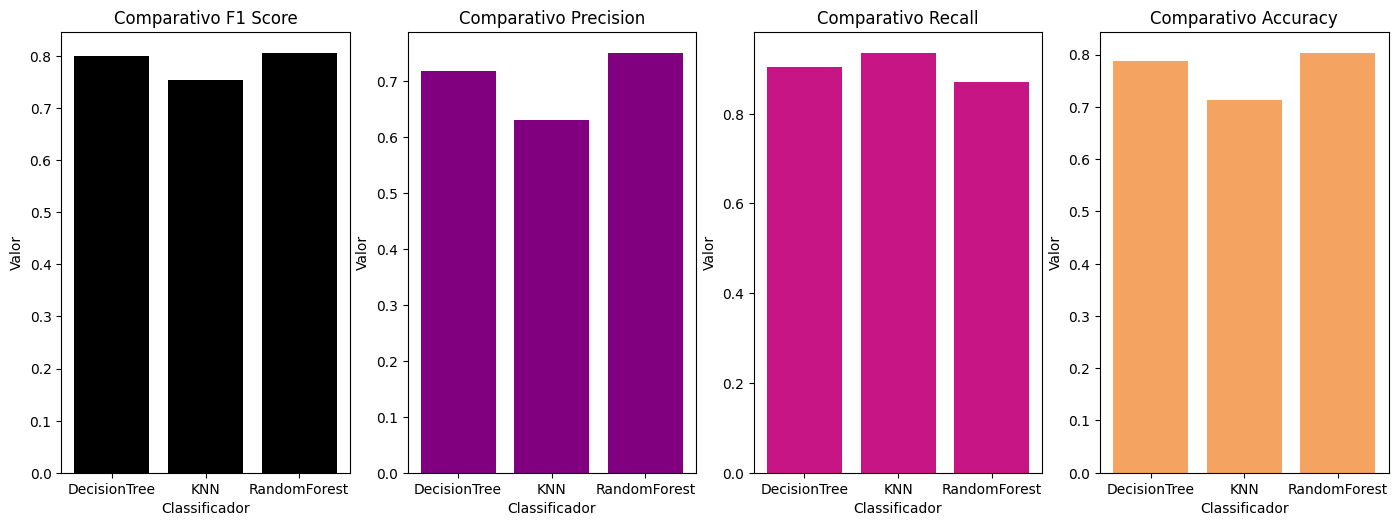

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(14, 5), dpi=100)
plt.tight_layout()

dicF1 = {"DecisionTree" : f1_score(y_testDT, dTPred), 
         "KNN" : f1_score(y_testKNN, knnPred),
         "RandomForest" : f1_score(y_testRFC, rfcPred)}

dicPrecisao = {"DecisionTree" : precision_score(y_testDT, dTPred), 
               "KNN" : precision_score(y_testKNN, knnPred),
               "RandomForest" : precision_score(y_testRFC, rfcPred)}

dicRecall = {"DecisionTree" : recall_score(y_testDT, dTPred), 
             "KNN" : recall_score(y_testKNN, knnPred),
             "RandomForest" : recall_score(y_testRFC, rfcPred)}

dicAcuracia = {"DecisionTree" : accuracy_score(y_testDT, dTPred), 
               "KNN" : accuracy_score(y_testKNN, knnPred),
               "RandomForest" : accuracy_score(y_testRFC, rfcPred)}

axes[0].bar(dicF1.keys(), dicF1.values(), color = "black")  
axes[0].set_title("Comparativo F1 Score")
axes[0].set_xlabel("Classificador")             
axes[0].set_ylabel("Valor")  

axes[1].bar(dicPrecisao.keys(), dicPrecisao.values(), color = "purple")  
axes[1].set_title("Comparativo Precision")
axes[1].set_xlabel("Classificador")             
axes[1].set_ylabel("Valor")  

axes[2].bar(dicRecall.keys(), dicRecall.values(), color = "#C71585")  
axes[2].set_title("Comparativo Recall")
axes[2].set_xlabel("Classificador")             
axes[2].set_ylabel("Valor")  

axes[3].bar(dicAcuracia.keys(), dicAcuracia.values(), color = "#F4A460")  
axes[3].set_title("Comparativo Accuracy")
axes[3].set_xlabel("Classificador")             
axes[3].set_ylabel("Valor")  


plt.show()    



# Resultados

**Métricas**

* O melhor *F1 Score* é o do Random Forest com 0.806
* A melhor *Precisão* também é a do Random Forest com 0.75
* O melhor *Recall* é o do KNN com 0.9355
* A melhor *Acurácia* é do Random Forest com 0.803

**Classificadores**
* Os classificadores *Decision Tree* e *Random Forest* obtiveram resultados semelhantes
* De modo geral, o melhor classificador para a predição de vagas falsas seria o **Random Forest**